In [3]:
print('Hello world')

Hello world


In [51]:
from google.cloud import bigquery
import pandas as pd

In [5]:
client = bigquery.Client(location="US")
print("Client creating using default project: {}".format(client.project))

Client creating using default project: ut-goog


In [8]:
query = """
    SELECT zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
FROM
  `bigquery-public-data.cfpb_complaints.complaint_database` 
"""
query_job = client.query(
    query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query

df = query_job.to_dataframe()

In [9]:
df.columns
#mean, distribution (plot histograms), categorical, mode, missing values (why? impute?), most common product

Index(['zip_code', 'tags', 'consumer_consent_provided', 'submitted_via',
       'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'],
      dtype='object')

In [10]:
df.describe()

,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
count,1363817,204679,1486923,1504898,1504898,1504897,1504898,768479,1504898
unique,23699,3,5,6,2947,8,2,2,1504898
top,300XX,Servicemember,N/A,Web,2017-09-08,Closed with explanation,True,False,2916251
freq,9475,102402,598049,1131985,3387,1171863,1469475,620101,1


In [27]:
#see highest % of missing values
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

tags                            86.399145
consumer_disputed               48.934812
zip_code                         9.374788
consumer_consent_provided        1.194433
company_response_to_consumer     0.000066
complaint_id                     0.000000
timely_response                  0.000000
date_sent_to_company             0.000000
submitted_via                    0.000000
dtype: float64

In [30]:
#see number of missing values
(len(df)-df.isnull().sum()).sort_values(ascending = False)

complaint_id                    1504898
timely_response                 1504898
date_sent_to_company            1504898
submitted_via                   1504898
company_response_to_consumer    1504897
consumer_consent_provided       1486923
zip_code                        1363817
consumer_disputed                768479
tags                             204679
dtype: int64

In [20]:
df['zip_code'].value_counts().head(n=20)

300XX    9475
330XX    8598
331XX    8111
770XX    7457
606XX    6251
334XX    6024
750XX    5990
303XX    5673
900XX    5125
333XX    5065
945XX    4995
891XX    4787
302XX    4637
112XX    4482
070XX    4181
191XX    3963
207XX    3796
604XX    3729
301XX    3687
100XX    3481
Name: zip_code, dtype: int64

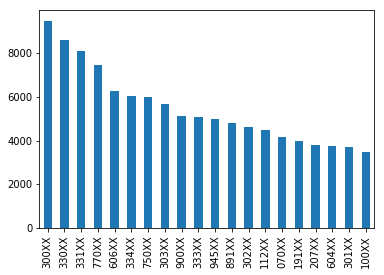

In [21]:
df['zip_code'].value_counts().head(n=20).plot(kind='bar')

In [32]:
df['tags'].value_counts()

Servicemember                    102402
Older American                    85542
Older American, Servicemember     16735
Name: tags, dtype: int64

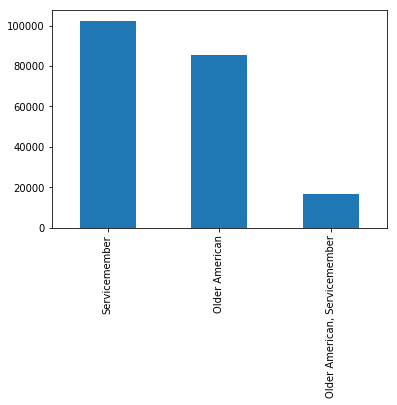

In [39]:
df['tags'].value_counts().plot(kind='bar')

In [40]:
#high number of N/A's for consumer consent
df['consumer_consent_provided'].value_counts()

N/A                     598049
Consent provided        494716
Consent not provided    362094
Other                    30444
Consent withdrawn         1620
Name: consumer_consent_provided, dtype: int64

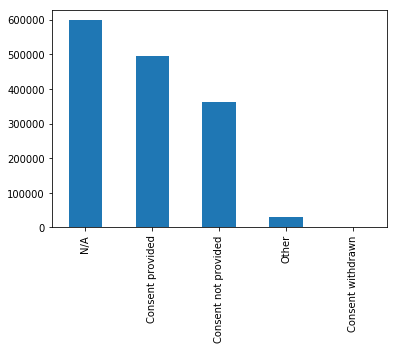

In [42]:
df['consumer_consent_provided'].value_counts().plot(kind='bar')

In [44]:
#most people submitted online
df['submitted_via'].value_counts()

Web            1131985
Referral        188731
Phone            90259
Postal mail      73059
Fax              20446
Email              418
Name: submitted_via, dtype: int64

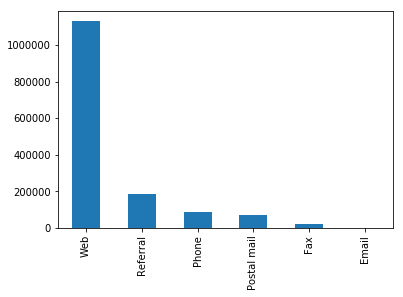

In [45]:
df['submitted_via'].value_counts().plot(kind='bar')

In [ ]:
'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'

In [57]:
#changing column to date time object (extracted out year and month)
df['date_sent_to_company'] =  pd.to_datetime(df['date_sent_to_company'])
df['year'], df['month'] = df['date_sent_to_company'].dt.year, df['date_sent_to_company'].dt.month

In [60]:
df['year'].value_counts()

2019    277783
2018    257095
2017    243433
2016    191380
2015    168663
2014    153453
2013    107406
2012     71603
2020     31747
2011      2335
Name: year, dtype: int64

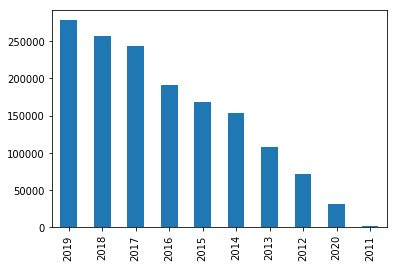

In [65]:
#most complaints have been submitted in recent years
df['year'].value_counts().plot(kind='bar')

In [66]:
df['month'].value_counts()

1     138676
8     132524
10    130443
9     129978
7     127790
3     126999
5     122924
4     122501
6     122231
12    118366
2     116442
11    116024
Name: month, dtype: int64

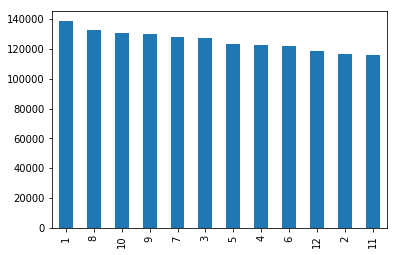

In [67]:
#most complaints in January and August

df['month'].value_counts().plot(kind='bar')

In [68]:
#possible overlap in "closed with relief" and "closed with non-monetary/monetary relief"
df['company_response_to_consumer'].value_counts()

Closed with explanation            1171863
Closed with non-monetary relief     193048
Closed with monetary relief          83115
Closed without relief                17868
Closed                               17611
In progress                           9005
Untimely response                     7083
Closed with relief                    5304
Name: company_response_to_consumer, dtype: int64

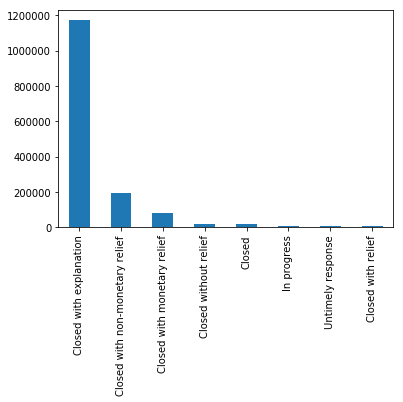

In [69]:
#high number of complaints closed with explanation
df['company_response_to_consumer'].value_counts().plot(kind='bar')

In [76]:
#most responses are timely
df['timely_response'].value_counts()

True     1469475
False      35423
Name: timely_response, dtype: int64

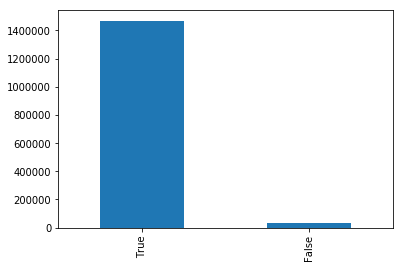

In [75]:
df['timely_response'].value_counts().plot(kind='bar')

In [94]:
#see how many timely response & closed with explanation out of total number of timely responses
#76% of timely responses closed with explanation
mask_timely = df['timely_response']==True
mask_company_response = df['company_response_to_consumer']=='Closed with explanation'
mask_combined = mask_timely & mask_company_response

len(df[mask_combined])/len(df['timely_response']==True)*100

76.3546765295721

In [95]:
df['consumer_disputed'].value_counts()

False    620101
True     148378
Name: consumer_disputed, dtype: int64

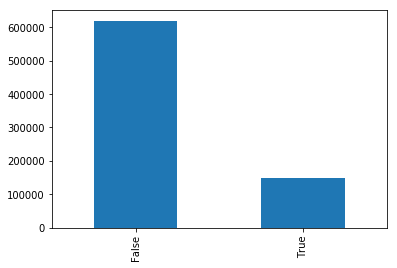

In [96]:
df['consumer_disputed'].value_counts().plot(kind='bar')

In [103]:
#number of unique complaint ID's
len(df['complaint_id'].unique())

1504898